In [1]:
from scipy.integrate import quad as integrate, trapz 
from scipy import interpolate
from tqdm import tqdm #библиотека индикатора процесса
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#matplotlib.use("nbagg")   # пакет для анимации 
matplotlib.rcParams.update({'font.size': 16})
fs = (6,4)

In [2]:
lq = 3#np.pi/2
Num = 0 #100_000 # количество генерируемых точек
hxi = 0.01*np.pi # шаг генерации
beta = 0.0276 # температурный делитель
l = 2*np.pi # область генерации начального распределения
 
phix = 0 #-np.pi

In [3]:
np.random.seed(1997)
# в прибдлижении используем нармальное распределение
phi_points = np.random.normal(0, np.sqrt(lq*beta), Num)# значения phi c требуемым распределением
p_points = np.random.normal(0, np.sqrt(beta), Num)

In [140]:
def phixx(t): # функция именения параметра управления
    return phix + np.pi*(np.tanh(2*np.pi*t/tau - np.pi)+1) 
    
def H(t, phi, p): # гамильтониан
    return p**2/2 + (phi-phixx(t))**2/(2*lq) + 1 - np.cos(phi)

def F(t, phi, p):  
    return p, -np.sin(phi) - (phi - phix - np.pi*(np.tanh(2*np.pi*t/tau - np.pi)+1))/lq - gamma*p

tau = 1000 # характерное время переключения
T = 1000 # полный интервал времени
dt = 0.05 # шаг по времени
t = np.linspace(0,T, int(T/dt))
gamma = 0

In [141]:
phi_points = 0 #  для начала выбрали единичную траекторию 
p_points =  0  
plot_iter = 0
gamma = 0.
phi_list = []

for it in tqdm(t):
    plot_iter += 1
    plt.clf()
    k1 = F(it, phi_points, p_points)
    k2 = F(it+dt/2, phi_points + dt*k1[0]/2, p_points + dt*k1[1]/2)
    k3 = F(it+dt/2, phi_points + dt*k2[0]/2, p_points + dt*k2[1]/2)
    k4 = F(it+dt, phi_points + dt*k3[0], p_points + dt*k3[1])
    phi_points = phi_points + dt*(k1[0]+2*k2[0]+2*k3[0]+k4[0])/6
    p_points = p_points + dt*(k1[1]+2*k2[1]+2*k3[1]+k4[1])/6
    phi_list.append(phi_points.mean())


100%|██████████████████████████████████████████████████████████████████████████| 20000/20000 [00:02<00:00, 6879.13it/s]


<Figure size 432x288 with 0 Axes>

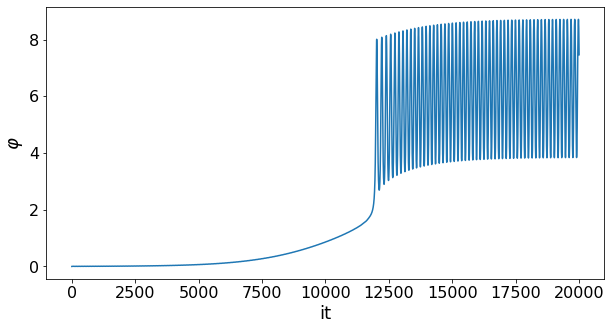

In [155]:
plt.figure(figsize = (10, 5))
plt.plot(phi_list)
plt.ylabel(r"$\varphi$", fontsize = 18)
#plt.title(r"$\gamma = {}$".format(gamma))
plt.xlabel( "it", fontsize = 18)
plt.show()

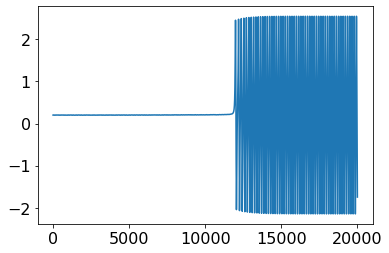

In [143]:
# интерполируем точки, чтобы получить функцию
from scipy.interpolate import CubicSpline

phi_t = CubicSpline(t, phi_list)

# и ее первую производную
phi_dt = phi_t(t,1) + 0.1 # добавили положительное з-е,  чтобы избежать нетоности вблизи 0

plt.plot(phi_dt + 0.1)
plt.show()

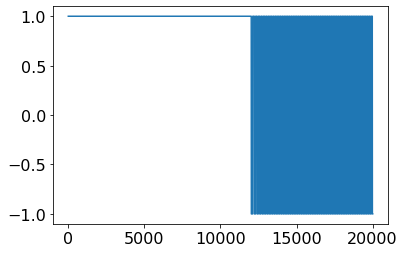

In [148]:
zeroes = [0] # индексы точек смены знака
s = np.sign(phi_dt)
for i in range(1000, len(phi_dt)):
    if s[i-1] + s[i] == 0:
        zeroes.append(i)
#zeroes
plt.plot(s)
plt.show()

теперь у меня есть набор координат где функция меняет знак. считается, что идеальное усреднение будет черед одну в месте быстрых осцилляций.
но как усреднять часть без осцилляций? изначально я хотела сделать один общий шаг (большой), а потом на нужные интервалы наложить более мелкое разбиение. теперь же встал вопрос: а нужно ли производить усреднение в месте без осцилляций?



In [149]:
a = zeroes[0]
b = zeroes[1]
c = zeroes[2]
list_new = []
coor = []
i = 0
while i < len(zeroes)-3:
    if abs(b - a) > 500:
        for j in range(a, b-42):   #   на большом интервале среднее равно самой функции, 
            list_new.append(phi_list[j])   # но с обрезанием до первой смены знака производной
            coor.append(j)
        i = i+1
        a = zeroes[i]
        b = zeroes[i+1]
        c = zeroes[i+2]
        
    else:
        list_new.append(np.mean(phi_list[a:c]))
        coor.append(b)
        i += 2
        a = zeroes[i]
        b = zeroes[i+1]
        c = zeroes[i+2]
        

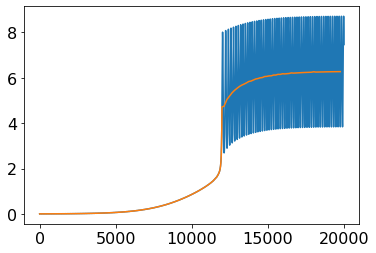

In [158]:
plt.plot(phi_list)
plt.plot(coor, list_new)
plt.show()

In [31]:
l_out = 0.3
l_a = 1.125
l = 0.125

In [32]:
a = (l_a + l_out)/(l*l_a - l_out*(l+l_a))
b = (l_a + 2*l_out)/